In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
from cdft.dft1d import dft_core

In [2]:
device = torch.device('cpu')

m = torch.tensor([1.0, 1.0], dtype=torch.float64)
sigma = torch.tensor([1.0, 3.630/3.405], dtype=torch.float64)
epsilon = torch.tensor([1.0, 163.1/119.8], dtype=torch.float64)
parameters = {'m':m, 'sigma':sigma, 'epsilon':epsilon}

In [3]:
T = 2.0
bulk_density = torch.tensor([0.444], dtype=torch.float64)
composition = torch.tensor([0.262, 1.0-0.262], dtype=torch.float64) 

system_size = 5.0
cell_size = 1e-2

dft = dft_core(parameters, T, system_size, cell_size, device)

In [4]:
def potential_9_3(z,sigma,epsilon):
    return epsilon*((sigma/z)**9-(sigma/z)**3)

Vext = np.zeros((dft.Nc,dft.points), dtype=np.float64)
Vext[0,0] = np.inf
Vext[0,dft.points-1] = np.inf
Vext[1,0] = np.inf
Vext[1,dft.points-1] = np.inf

Vext[0,1:dft.points-1] = potential_9_3(dft.z[1:dft.points-1],0.5621,23.998) \
    +potential_9_3(system_size-dft.z[1:dft.points-1],0.5621,23.998)
Vext[1,1:dft.points-1] = potential_9_3(dft.z[1:dft.points-1],0.588,31.630) \
    +potential_9_3(system_size-dft.z[1:dft.points-1],0.588,31.630)

In [5]:
dft.initial_condition(bulk_density, composition, Vext)

In [6]:
dft.equilibrium_density_profile(bulk_density,composition,fmt='WB',solver='fire',alpha0=0.2,dt=0.1,tol=1e-8,logoutput=True)

1 tensor(4.2329, dtype=torch.float64)
2 tensor(4.1628, dtype=torch.float64)
3 tensor(4.0455, dtype=torch.float64)
4 tensor(3.8805, dtype=torch.float64)
5 tensor(3.6696, dtype=torch.float64)
6 tensor(3.4313, dtype=torch.float64)
7 tensor(3.2928, dtype=torch.float64)
8 tensor(3.7874, dtype=torch.float64)
9 tensor(4.6847, dtype=torch.float64)
10 tensor(3.5696, dtype=torch.float64)
11 tensor(2.2234, dtype=torch.float64)
12 tensor(1.8141, dtype=torch.float64)
13 tensor(1.4757, dtype=torch.float64)
14 tensor(1.3356, dtype=torch.float64)
15 tensor(1.3984, dtype=torch.float64)
16 tensor(0.3865, dtype=torch.float64)
17 tensor(0.2266, dtype=torch.float64)
18 tensor(0.8113, dtype=torch.float64)
19 tensor(0.3558, dtype=torch.float64)
20 tensor(0.2568, dtype=torch.float64)
21 tensor(0.1660, dtype=torch.float64)
22 tensor(0.1602, dtype=torch.float64)
23 tensor(0.1592, dtype=torch.float64)
24 tensor(0.1209, dtype=torch.float64)
25 tensor(0.1303, dtype=torch.float64)
26 tensor(0.1684, dtype=torch.floa

In [7]:
mc1 = np.loadtxt('data/argon_krypton_1.dat')
mc2 = np.loadtxt('data/argon_krypton_2.dat')

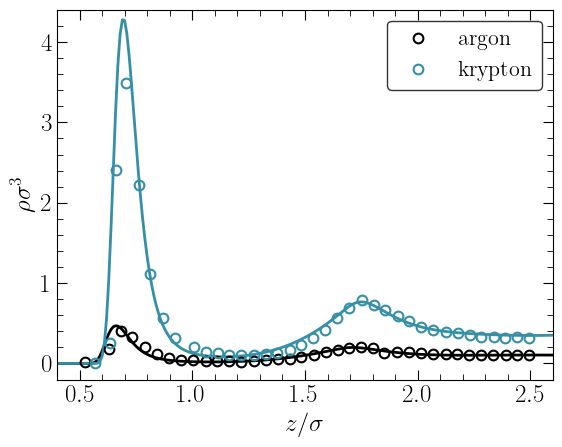

In [12]:
import seaborn as sns
colors = sns.color_palette("mako")
plt.rcParams.update({'text.usetex':True, 
'font.family':'serif'
})

plt.plot(dft.z, dft.rho[0], color='k', linewidth=2.0)
plt.plot(dft.z, dft.rho[1], color=colors[3], linewidth=2.0)
plt.plot(mc1[:,0], mc1[:,1], 'o', color='k', markersize=7, markeredgewidth=1.5, mfc = 'none', label='argon')
plt.plot(mc2[:,0], mc2[:,1], 'o', color=colors[3], markersize=7, markeredgewidth=1.5, mfc = 'none', label='krypton')
plt.xlabel(r'$z/\sigma$', fontsize=18)
plt.ylabel(r'$\rho \sigma^3$', fontsize=18)
plt.xlim((0.4,2.6))
plt.ylim([-0.2,4.4])
plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=18)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
# xticks = np.arange(0, 1e4,10)
# yticks = np.arange(0,16.1,4)
plt.tick_params(direction='in',which='minor', length=4, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=7, bottom=True, top=True, left=True, right=True)
# plt.xticks(xticks)
# plt.yticks(yticks)
plt.legend(fontsize=16, frameon=True, edgecolor='k')
# plt.savefig('figures/fmt_1d_mixture_1.pdf', bbox_inches='tight')